# <center><b>Analysis on Car Second Hand Dataset<b></center>

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Information**](#Section42)

**5.** [**Data Pre-Profiling**](#Section5)<br>
  - **5.1** [**Missing value**](#Section51)
  - **5.2** [**Duplicate rows**](#Section52)
  - **5.3** [**Outliers**](#Section53)

**6.** [**Data Cleaning**](#Section6)<br>
**7.** [**Exploratory Data Analysis**](#Section7)<br>
**8.** [**Post Data Processing**](#Section8)<br>
  - **8.1** [**Data Preparation**](#Section81)<br>
  - **8.2** [**One Hot encoding**](#Section82)<br>
  - **8.3** [**Train test split**](#Section83)<br>
  - **8.4** [**Data Standardization**](#Section84)

**9.** [**Model Development & Evaluation**](#Section9)<br>
  - **9.1** [**Model 1**](#Section91)<br>
  - **9.2** [**Model 2**](#Section92)<br>
   - **9.2.1** [**Train test split**](#Section921)<br>
   - **9.2.2** [**Data Standardization**](#Section922)<br>
   - **9.2.3** [**Linear Model**](#Section923)<br>
  - **9.3** [**Model 3**](#Section93)<br>
   - **9.3.1** [**Train test split**](#Section931)<br>
   - **9.3.2** [**Data Standardization**](#Section932)<br>
   - **9.3.3** [**Linear Model**](#Section933)<br>

**10.** [**Summarization**](#Section10)<br>

---
<a name = Section1></a>
# **1. Introduction**
---

- Even as new car sales have slowed down in the recent past, the **pre-owned car market** has continued to grow over the past year and is larger than the new car market now.

- Experts said a slowdown in new car sales could mean the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with **pre-owned cars** instead of buying new ones.

- In the increasingly **competitive environment**, enterprises have to create a decision-making model for precision marketing on provide right value to particulat brand.

<center><img width=50% src="https://dealerimages.dealereprocess.com/image/upload/w_700/1157477.jpg"></center>

- The case study considers a **marketing problem** of find right value and good condition **pre-owned car**.

- This case study demonstrates that our **proposed decisions** and insights are capable of providing a good **precision marketing strategy**.

- The real-world data from a Car Dekho were collected and used in this case study to illustrate how to implement EDA.

---
<a name = Section2></a>
# **2. Problem Statement**
---

- **The pre-owned car** is a market that is taking a boom year after year.
- To increase sales of good condition **pre-owned car** in market
- They track which kind of car and its market value from various brands.
- Since **2004** there is a constant hike in sales of pre-owned cars. 
- As Data Science role I have been hired to analyze their transactional data from 2004 till 2020.
- I will present an initial investigation on this data to check for various patterns and trends of selling cars.
- This would be a **leading step** to help the customer and company get the right price of cars.

---
<a name = Section3></a>
# **3. Installing and Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing & Upgrading Libraries**

In [1]:
!pip install -q datascience 
!pip install -q pandas-profiling

In [2]:
!pip install -q --upgrade pandas-profiling

In [3]:
!pip install --upgrade pandas

<a name = Section33></a>
### **3.2 Importing Libraries**

In [4]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.2f' % x)         # To suppress scientific notation over exponential values
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface of matplotlib
import seaborn as sns                                                # For datetime operations
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once
import re

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---


- The dataset consists of information about the Cars model, selling price, Kilometer Driven, and cars details like transmission, fuel type, and mileage.

| Records | Features | Dataset Size |
| :--: | :--: | :--: |
| 8128 | 13 | 825.6 KB | 

<br>

| # | Feature Name | Feature Description |
|:--:|:--|:--| 
|1| Name | Cars name with detail information |
|2| Year | Year of model  |
|3| Selling Price |	Selling price of car |
|4| KM Driven |	Kilometer driven of car by multiple owners |
|5| Fule |	Fuel type like **Diesel, Petrol, CNG, LPG** |
|6| Seller Type |	Type of seller like **Individual, Dealer, Trustmark Dealer** |
|7| Transmission |	Transmission type like **Manual and Automatic** |
|8| Owner |	Type of owner from first to forth|
|9| Other |	Other cars attribute like **milage in KMPL, engine in CC, max power in BHP, torque and numebr of seats**|

In [5]:
ds_car = pd.read_csv('Car details v3.csv')
print('Data shape : ', ds_car.shape)
ds_car.head()

Data shape :  (8128, 13)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.00
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.00


**Observations:**

- We can see there are total 8128 records and 13 features.

- Features like mileage, engine, power, torque are object type. These needs to corrected first before we can can do further processing.

<a name = Section42></a>
### **4.1 Data Information**

- In this section we will see the **information about the types of features**.

In [6]:
ds_car.describe()

,year,selling_price,km_driven,seats
count,8128.00,8128.00,8128.00,7907.00
mean,2013.80,638271.81,69819.51,5.42
std,4.04,806253.40,56550.55,0.96
min,1983.00,29999.00,1.00,2.00
25%,2011.00,254999.00,35000.00,5.00
50%,2015.00,450000.00,60000.00,5.00
75%,2017.00,675000.00,98000.00,5.00
max,2020.00,10000000.00,2360457.00,14.00


In [7]:
ds_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


**Observations:**

- As analysed before features like mileage, engine, power, torque needs to be converted to float or int to get useful information like min, max, mean, std.

- **Year, Selling price** and **KM driven** are int type.
- **Seat** is of type float. It should be int as the seat cannot be like 4.5 or 6.78. But it won't affect our analysis till it is X.00

<a name = Section5></a>

---
# **5. Data Pre-Profiling**
---

<a name = Section51></a>
### **5.1 Missing Value**

- For **quick analysis** will use pandas methods to find out missing values.

In [8]:
100*(ds_car.shape[0]-ds_car.count())/ds_car.shape[0]

name            0.00
year            0.00
selling_price   0.00
km_driven       0.00
fuel            0.00
seller_type     0.00
transmission    0.00
owner           0.00
mileage         2.72
engine          2.72
max_power       2.65
torque          2.73
seats           2.72
dtype: float64

**Observations:**

- As we can see around 2.7% values are missing and they are objct type.
- In order to convert it to continues variable we need to eliminate null values.

<a name = Section52></a>
### **5.2 Duplicate rows**

- For **quick analysis** will use pandas methods to find out duplicates values.

In [9]:
ds_car[ds_car.duplicated()].tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
7987,Renault Captur 1.5 Diesel RXT,2018,1265000,12000,Diesel,Individual,Manual,First Owner,20.37 kmpl,1461 CC,108.45 bhp,240Nm@ 1750rpm,5.00
7988,Maruti Ciaz Alpha Diesel,2019,1025000,32000,Diesel,Individual,Manual,First Owner,28.09 kmpl,1248 CC,88.50 bhp,200Nm@ 1750rpm,5.00
8117,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.00
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.00
8127,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.00


In [10]:
ds_car[ds_car['name'] == 'Maruti Swift VXI'].head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
102,Maruti Swift VXI,2019,615000,10000,Petrol,Individual,Manual,First Owner,21.21 kmpl,1197 CC,81.80 bhp,113Nm@ 4200rpm,5.00
162,Maruti Swift VXI,2012,340000,24300,Petrol,Dealer,Manual,First Owner,21.21 kmpl,1197 CC,81.80 bhp,113Nm@ 4200rpm,5.00
295,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.00
296,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.00
1326,Maruti Swift VXI,2019,585000,10000,Petrol,Individual,Manual,First Owner,21.21 kmpl,1197 CC,81.80 bhp,113Nm@ 4200rpm,5.00


**Observations:**

- Definitely, we have **duplicate** because we cannot have the same selling price and km driven.
- Seeing two values as Maruti and Tata we have to **eliminate duplicate** values because it will affect our analysis.


### Before checking for outliers we need to correct data and remove postfix from columns that are required.

<a name = Section6></a>

---
# **6. Data Cleaning**
---

- In this section, we will perform the **cleaning** operations over the features using information from the previous section.

- We will simply **drop** the **rows** that contain **missing** values.

- We will also duplicated values becuase it will missguilde our analysis.

In [11]:
...
#Removing missing value first in order to correct value which have postfix to value.
...
# Dropping rows containing missing values
ds_car.dropna(inplace=True)
# Dropping rows containing duplicates
ds_car.drop_duplicates(inplace= True)

In [12]:
# One way to remoeve postfix from engine and convert it to int
def milageToFloat(x):
    return float(re.findall(r'\d+\.\d+', x)[0])

In [13]:
# One way to remoeve postfix from milage and convert it to float
def engineToInt(x):
    return int(re.findall(r'\d+', x)[0])

In [14]:
ds_car['mileage KMPL'] = ds_car['mileage'].apply(milageToFloat)
ds_car.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,mileage KMPL
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.00,23.40
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.00,21.14


In [15]:
ds_car['engine CC'] = ds_car['engine'].apply(engineToInt)
ds_car.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,mileage KMPL,engine CC
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.00,23.40,1248
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.00,21.14,1498


In [16]:
# As power contaion both Int and Float I am taking different approch to remove postfix.
# After that will convert whole value as float because it contain value as int and float.

ds_car['power BHP'] = (ds_car['max_power'].astype(str).str.replace('bhp','')).astype(float)
ds_car.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,mileage KMPL,engine CC,power BHP
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.00,23.40,1248,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.00,21.14,1498,103.52


**Observations:**

- We removed null **rows** and **duplicate** values from dataset.
- We are successful to convert Mileage, Engine and Max Power as new columns
- **Torque** feature have too many different values in each cell so I am deciding it to **drop column** and it have two value as **Nm** and **rpm** also some cell have **rpm** value as **range**.
- Also dropping colums as **milage, engine and max power** as I have process these columns as new columns

In [17]:
ds_car.drop(['mileage', 'engine', 'max_power', 'torque'], axis=1, inplace= True)
ds_car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,mileage KMPL,engine CC,power BHP
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.00,23.40,1248,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.00,21.14,1498,103.52
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.00,17.70,1497,78.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.00,23.00,1396,90.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.00,16.10,1298,88.20


**Observations:**

- Now we have to remove the missing value and duplicate value.
- I can have preprocessed data and anything left in terms of missing and duplicate values.
- I have left to check with outliers. Now few features data is proper we can find outliers with more features.

<a name = Section53></a>
### **5.3 Outliers**

- For **quick analysis** will use pandas methods to find out outliers.

In [18]:
ds_car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6717 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   object 
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   object 
 5   seller_type    6717 non-null   object 
 6   transmission   6717 non-null   object 
 7   owner          6717 non-null   object 
 8   seats          6717 non-null   float64
 9   mileage KMPL   6717 non-null   float64
 10  engine CC      6717 non-null   int64  
 11  power BHP      6717 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 682.2+ KB


In [19]:
ds_car.describe()

,year,selling_price,km_driven,seats,mileage KMPL,engine CC,power BHP
count,6717.00,6717.00,6717.00,6717.00,6717.00,6717.00,6717.00
mean,2013.61,526386.00,73398.34,5.43,19.47,1430.99,87.77
std,3.90,523550.45,58703.28,0.98,4.05,493.47,31.72
min,1994.00,29999.00,1.00,2.00,0.00,624.00,32.80
25%,2011.00,250000.00,38000.00,5.00,16.80,1197.00,67.10
50%,2014.00,420000.00,68203.00,5.00,19.44,1248.00,81.83
75%,2017.00,650000.00,100000.00,5.00,22.50,1498.00,100.00
max,2020.00,10000000.00,2360457.00,14.00,42.00,3604.00,400.00


In [20]:
IQR_M_P = ds_car.describe()['mileage KMPL']['75%'] + (1.5 * (ds_car.describe()['mileage KMPL']['75%'] - ds_car.describe()['mileage KMPL']['25%']))
IQR_M_N = ds_car.describe()['mileage KMPL']['25%'] - (1.5 * (ds_car.describe()['mileage KMPL']['75%'] - ds_car.describe()['mileage KMPL']['25%']))



In [21]:
print('Negative IQR range: ', IQR_M_N)
ds_car[ds_car['mileage KMPL'] < IQR_M_N].shape[0]

Negative IQR range:  8.250000000000002


15

In [22]:
print('Positive IQR range: ', IQR_M_P)
ds_car[ds_car['mileage KMPL'] > IQR_M_P].shape[0]

Positive IQR range:  31.049999999999997


6

**Observations:**

- As we can see minimum mileage as 0 and maximum as 42 which cannot be possible in real world.
- Definetly we have outliers for mileage. 
- As mean and median are almost same instead of removing value I decided to replace value of outliers.
- I can use mean value for both negative and positive outliers.

In [23]:
IQR_E_P = ds_car.describe()['engine CC']['75%'] + (1.5 * (ds_car.describe()['engine CC']['75%'] - ds_car.describe()['engine CC']['25%']))
IQR_E_N = ds_car.describe()['engine CC']['25%'] - (1.5 * (ds_car.describe()['engine CC']['75%'] - ds_car.describe()['engine CC']['25%']))



In [24]:
print('Negative IQR range: ', IQR_E_N)
ds_car[ds_car['engine CC'] < IQR_E_N].shape[0]

Negative IQR range:  745.5


25

In [25]:
print('Positive IQR range: ', IQR_E_P)
ds_car[ds_car['engine CC'] > IQR_E_P].shape[0]

Positive IQR range:  1949.5


1182

**Observations:**

- As we can see minimum engine cc as 745 and maximum as 1949.5 .
- As per research 800 cc is miminum so values below 745 can be replace by mean. 
- As we have car range from 2 seater to 14 seater so will include maximum range of CC.

In [26]:
IQR_P_P = ds_car.describe()['power BHP']['75%'] + (1.5 * (ds_car.describe()['power BHP']['75%'] - ds_car.describe()['power BHP']['25%']))
IQR_P_N = ds_car.describe()['power BHP']['25%'] - (1.5 * (ds_car.describe()['power BHP']['75%'] - ds_car.describe()['power BHP']['25%']))



In [27]:
print('Negative IQR range: ', IQR_P_N)
ds_car[ds_car['power BHP'] < IQR_P_N].shape[0]

Negative IQR range:  17.749999999999986


0

In [28]:
print('Positive IQR range: ', IQR_P_P)
ds_car[ds_car['power BHP'] > IQR_P_P].shape[0]

Positive IQR range:  149.35000000000002


304

**Observations:**

- As we can there is no negative outiers.
- As we have car range from 2 seater to 14 seater so will include maximum range of power as BHP.

**Conclusion on Outliers:**
- We will replace both end outliers with mean value of **mileage**.
- We will replace negative outliers with mean value of **engine CC**.
- We have decided to keep all values of **power BHP**.
- We are not processign any data for **KM driven, Seats and Selling Price** 

**Old describe value before correcting**

In [29]:
ds_car.describe()

,year,selling_price,km_driven,seats,mileage KMPL,engine CC,power BHP
count,6717.00,6717.00,6717.00,6717.00,6717.00,6717.00,6717.00
mean,2013.61,526386.00,73398.34,5.43,19.47,1430.99,87.77
std,3.90,523550.45,58703.28,0.98,4.05,493.47,31.72
min,1994.00,29999.00,1.00,2.00,0.00,624.00,32.80
25%,2011.00,250000.00,38000.00,5.00,16.80,1197.00,67.10
50%,2014.00,420000.00,68203.00,5.00,19.44,1248.00,81.83
75%,2017.00,650000.00,100000.00,5.00,22.50,1498.00,100.00
max,2020.00,10000000.00,2360457.00,14.00,42.00,3604.00,400.00


In [30]:
mileage_mean = ds_car.describe()['mileage KMPL']['mean']
print('Mileage mean: ', mileage_mean)
engine_cc_mean = ds_car.describe()['engine CC']['mean']
print('Engine mean: ', engine_cc_mean)

Mileage mean:  19.466584784874193
Engine mean:  1430.9858567813012


In [31]:
ds_car.loc[(ds_car['mileage KMPL'] < IQR_M_N) | (ds_car['mileage KMPL'] > IQR_M_P), 'mileage KMPL'] = mileage_mean

In [32]:
ds_car.loc[(ds_car['engine CC'] < IQR_E_N), 'engine CC'] = engine_cc_mean

**New describe value after correcting**

In [33]:
ds_car.describe()

,year,selling_price,km_driven,seats,mileage KMPL,engine CC,power BHP
count,6717.00,6717.00,6717.00,6717.00,6717.00,6717.00,6717.00
mean,2013.61,526386.00,73398.34,5.43,19.50,1433.99,87.77
std,3.90,523550.45,58703.28,0.98,3.92,491.00,31.72
min,1994.00,29999.00,1.00,2.00,9.00,793.00,32.80
25%,2011.00,250000.00,38000.00,5.00,16.80,1197.00,67.10
50%,2014.00,420000.00,68203.00,5.00,19.47,1248.00,81.83
75%,2017.00,650000.00,100000.00,5.00,22.50,1498.00,100.00
max,2020.00,10000000.00,2360457.00,14.00,30.46,3604.00,400.00


<a name = Section7></a>

---
# **7. Exploratory Data Analysis**
---

**<h3>Note:** Adding a few new columns to get more insight. Like Brand and Sub Brand name from the name column</h3>

In [34]:
def brandName(x):
    return str(x).split()[0]

In [35]:
ds_car['brand'] = ds_car['name'].apply(brandName)

In [36]:
def subBrandName(x):
    return str(x).split()[1]

In [37]:
ds_car['sub_brand'] = ds_car['name'].apply(subBrandName)

In [38]:
ds_car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6717 entries, 0 to 8125
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   object 
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   object 
 5   seller_type    6717 non-null   object 
 6   transmission   6717 non-null   object 
 7   owner          6717 non-null   object 
 8   seats          6717 non-null   float64
 9   mileage KMPL   6717 non-null   float64
 10  engine CC      6717 non-null   float64
 11  power BHP      6717 non-null   float64
 12  brand          6717 non-null   object 
 13  sub_brand      6717 non-null   object 
dtypes: float64(4), int64(3), object(7)
memory usage: 787.1+ KB


In [39]:
ds_car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,mileage KMPL,engine CC,power BHP,brand,sub_brand
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.00,23.40,1248.00,74.00,Maruti,Swift
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.00,21.14,1498.00,103.52,Skoda,Rapid
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.00,17.70,1497.00,78.00,Honda,City
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.00,23.00,1396.00,90.00,Hyundai,i20
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.00,16.10,1298.00,88.20,Maruti,Swift


**<h3>Question:** What is the sale of car across each year?</h3>

<function matplotlib.pyplot.show(close=None, block=None)>

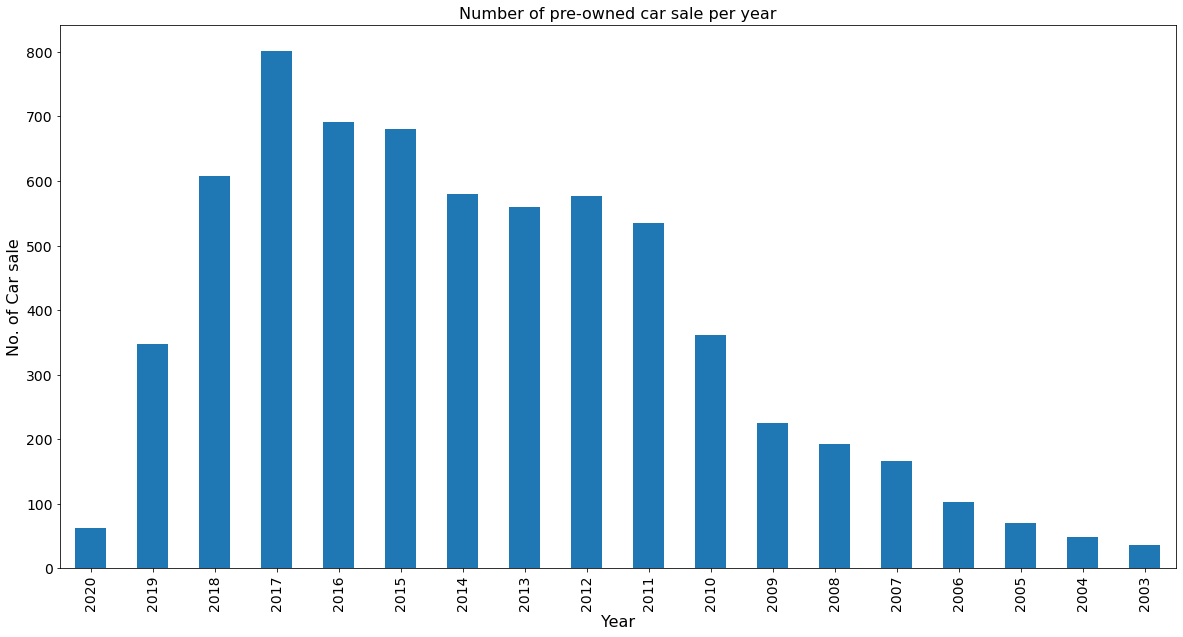

In [40]:
fig = plt.figure(figsize=(20, 10))
ds_car['year'].value_counts().sort_index(ascending=False)[:18].plot.bar()

plt.xlabel(xlabel='Year', fontsize=16)
plt.ylabel(ylabel='No. of Car sale', fontsize=16)
plt.title(label='Number of pre-owned car sale per year', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show

**Observations**:

- In **2017** we had the highest number of sales of pre-owned cars.

- There is an increase in sales from 2003 to 2017.

- There is a dip in sales in the year **2020 and 2019**.
- In 2020 we can conclude because of **pandemic**, hopefully, things will become better in the upcoming year.

**<h3>Question:** Range of CC common in most of cars</h3>

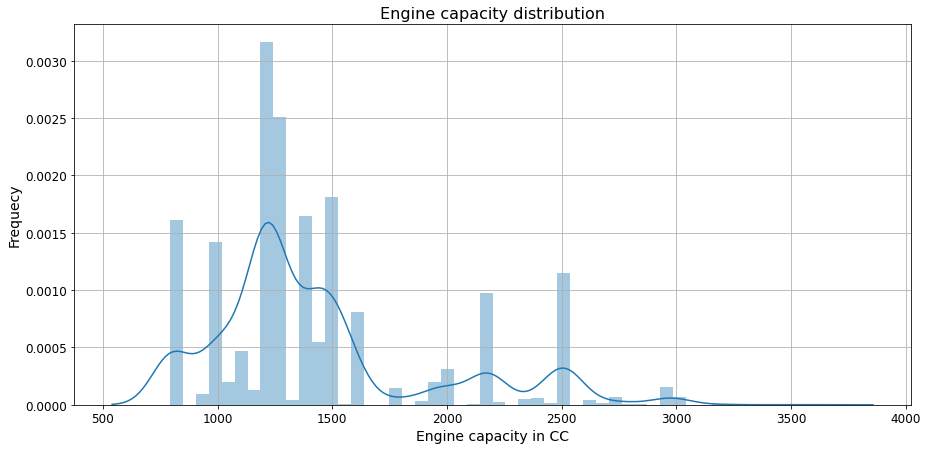

In [41]:
# Initialize figure of size 15 X 7
fig = plt.figure(figsize=(15, 7))

# Plot density distribution of age
sns.distplot(a=ds_car['engine CC'], kde=True)

# Add some cosmetics
plt.title(label='Engine capacity distribution', size=16)
plt.xlabel(xlabel='Engine capacity in CC', size=14)
plt.ylabel(ylabel='Frequecy', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.grid(b=True)

# Display the plot
plt.show()

**Observations**:

- Engine CC with range of **1000 to 1500** are more common in cars.

- There are few cars of **2000 and 2500** CC in market.

**<h3>Question:** Which fuel type of car have more demand?</h3>

In [42]:
udf = pd.Series(ds_car['fuel'].value_counts()[0:1].append(ds_car['fuel'].value_counts()[2:3]).append(ds_car['fuel'].value_counts()[1:2].append(ds_car['fuel'].value_counts()[-1:])) )

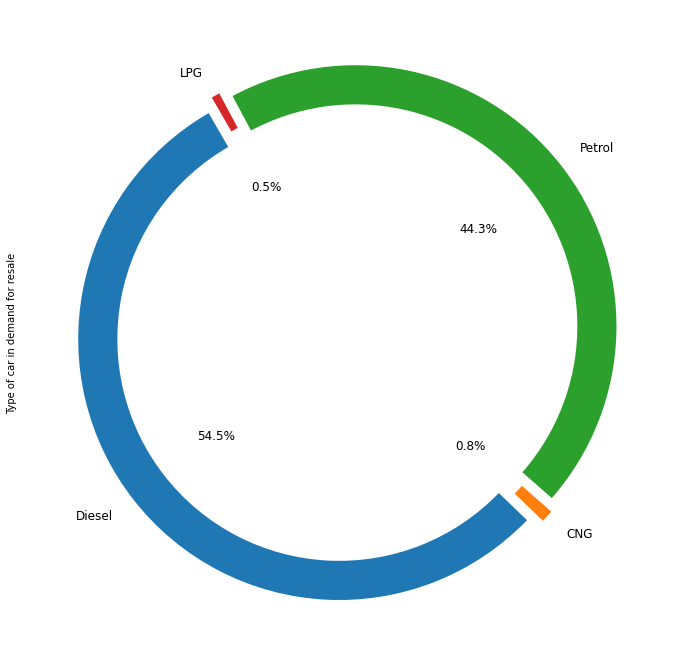

In [43]:
#fig = plt.figure(figsize=(20, 10))
udf.plot(kind='pie',
                                                                autopct='%3.1f%%',
                                                                wedgeprops=dict(width=0.15), 
                                                                explode=np.ones(4)/25,
                                                                figsize=(12, 12),
                                                                fontsize=12, 
                                                                startangle=120,
                                                                label='Type of car in demand for resale')
plt.show()

**Observations**:

- Definitely diesel cars have more demand.

- There is not much difference between diesel and petrol type cars.

- LPG and CNG are much less in demand.

**<h3>Question:** What kind of sellers are there in the market?</h3>

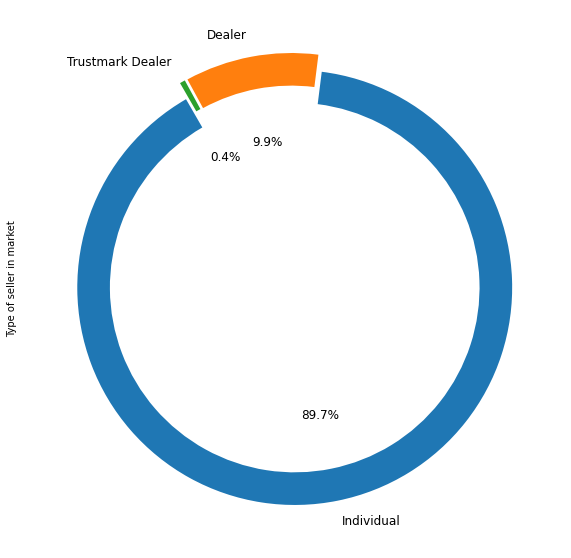

In [44]:
ds_car['seller_type'].value_counts().plot(kind='pie',
                                                                autopct='%3.1f%%',
                                                                wedgeprops=dict(width=0.15), 
                                                                explode=np.ones(3)/25,
                                                                figsize=(10, 10),
                                                                fontsize=12, 
                                                                startangle=120,
                                                                label='Type of seller in market')
plt.show()

**Observations**:

- People prefer selling cars by themself.

- Dealers are in market but very few of them are trusted delaer.

**<h3>Question:** Which brand is more popular in market?</h3>

In [45]:
ds_brand = ds_car['brand'].value_counts()[:10]

In [46]:
data = pd.Series(ds_car['brand'].value_counts()[10:].sum(), index =['Other'])

In [47]:
ds_brand = ds_brand.append(data)

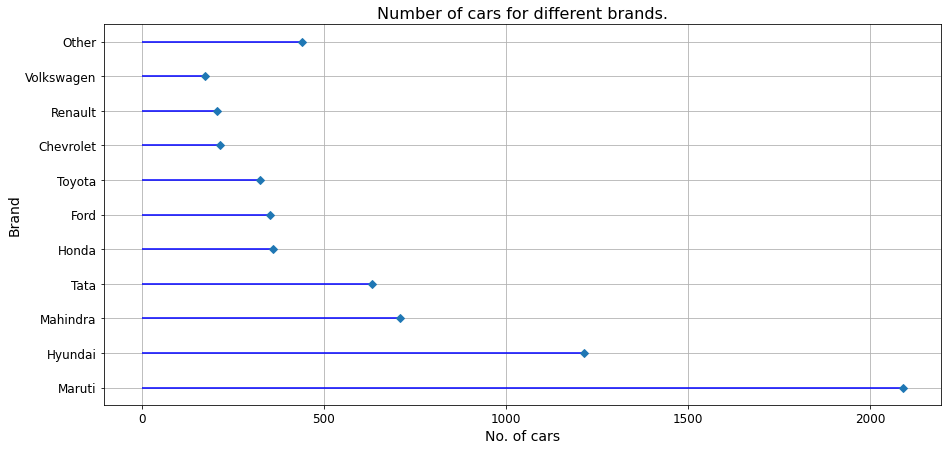

In [48]:
# Create a figure of 15 x 7 inches
plt.figure(figsize=(15,7))

# Plot 
plt.hlines(ds_brand.index,xmin=0,xmax=ds_brand,color='blue')
plt.plot(ds_brand,ds_brand.index , "D")

# Adding some cosmetics
plt.xlabel(xlabel='No. of cars', fontsize=14)
plt.ylabel(ylabel='Brand', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title(label='Number of cars for different brands.', fontsize=16)
plt.grid(b=True)

# Display the plot
plt.show()

**Observations**:

- **Maruti, Hyundai, Mahindra and Tata** hold most of the cars in the market.

- Out of which **Maruti** is almost double from second top **Hyundai**.

**<h3>Question:** Top 15 brand have better average and selling price?</h3>

In [49]:
mileage = (ds_car.groupby('brand')['mileage KMPL'].mean().sort_values(ascending=False))/ds_car['mileage KMPL'].max()

In [50]:
sellingPrice = (ds_car.groupby('brand')['selling_price'].mean().sort_values(ascending=False))/ds_car['selling_price'].max()

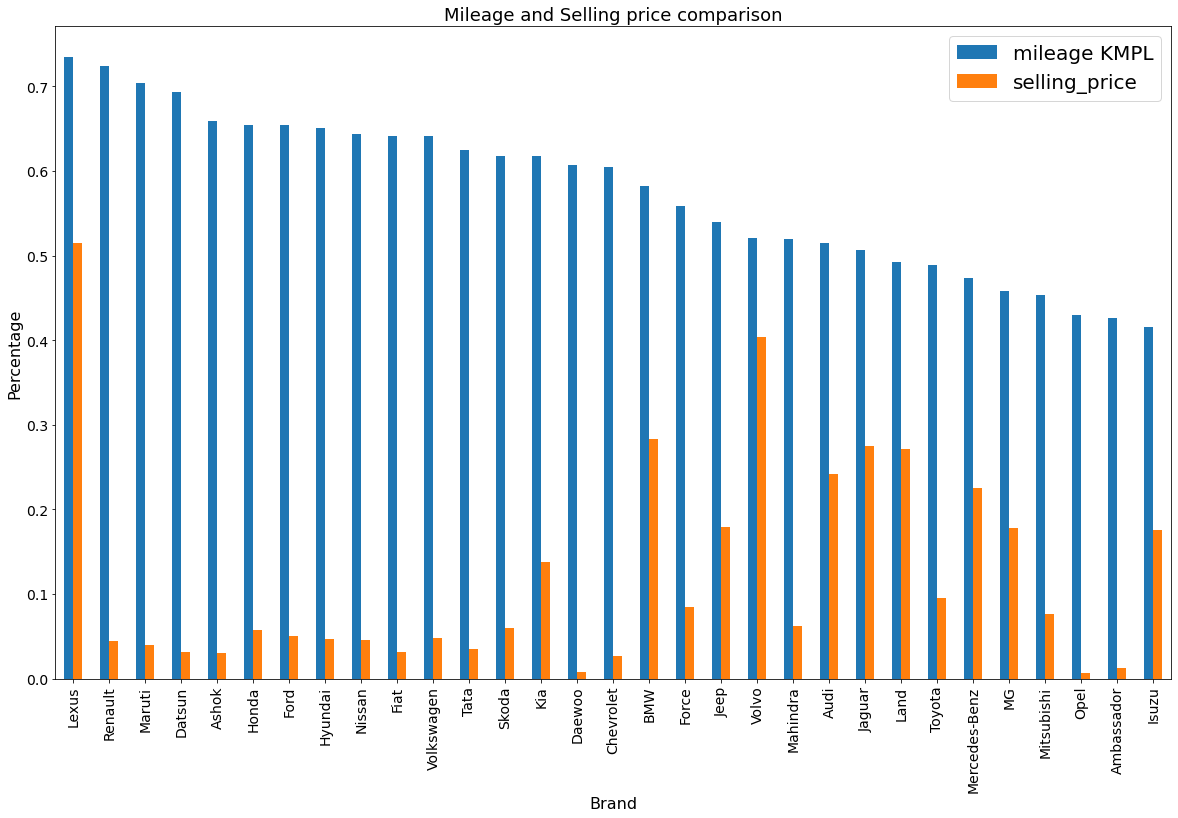

In [51]:
pd.concat([mileage, sellingPrice], axis=1).plot.bar(figsize=(20,12))
plt.title(label='Mileage and Selling price comparison', size=18)
plt.xlabel(xlabel='Brand', size=16)
plt.ylabel(ylabel='Percentage', size=16)
plt.xticks(size=14)
plt.yticks(size=14)
plt.legend(prop={'size': 20})
plt.show()

**Observations**:

- **Lexus, BWM, and Volvo** have better selling price and mileage.
- **Renault, Maruti, Datsun, Honda** have better mileage but not much selling price.
- Mileage of car doen't affect much on selling price of car.
- People and found of better mileage car in less cost.

**<h3>Question:** Which fuel type of car have more better selling price?</h3>

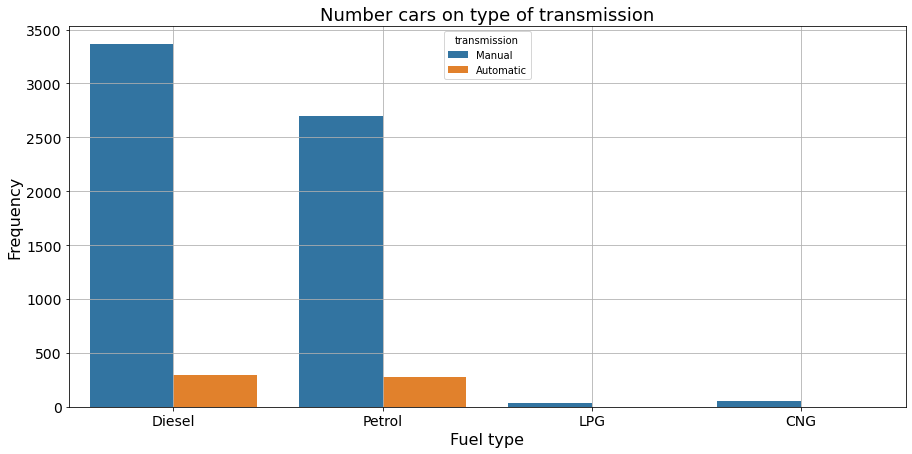

In [52]:
fig = plt.figure(figsize=(15, 7))

# Plot countplot of age concerning treatment
sns.countplot(x='fuel', hue='transmission', data=ds_car)

# Add some cosmetics
plt.title(label='Number cars on type of transmission', size=18)
plt.xlabel(xlabel='Fuel type', size=16)
plt.ylabel(ylabel='Frequency', size=16)
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(b=True)

# Display the plot
plt.show()

**Observations**:

- Automatic diesel have better resale value.

- Resale of Manual varient is almost similar of all fuel type.

- LPG and CNG are not much papular in Automatic.

**<h3>Question:** Which type of car have better average?</h3>

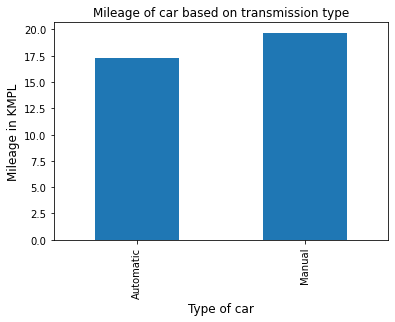

In [53]:
ds_car.groupby(['transmission'])['mileage KMPL'].mean().plot.bar()
plt.ylabel('Mileage in KMPL', fontSize = 12)
plt.xlabel('Type of car', fontSize = 12)
plt.title('Mileage of car based on transmission type')
plt.show()

**Observations**:

- Manual cars have better average.

**<h3>Question:** Does value of car descrease based on how many people have sold?</h3>

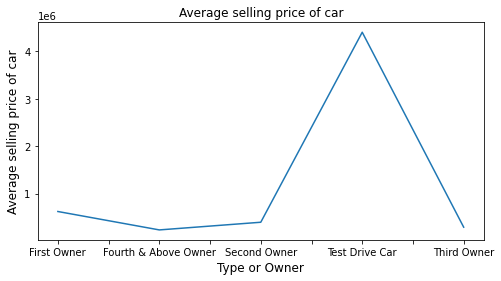

In [54]:
fig = plt.figure(figsize=(8, 4))
ds_car.groupby(['owner'])['selling_price'].mean().plot.line()
plt.ylabel('Average selling price of car', fontSize = 12)
plt.xlabel('Type or Owner', fontSize = 12)
plt.title('Average selling price of car')
plt.show()

**Observations**:

- There is huge gap between test drive car and resale after that.
- Price decrease little but my very little margine after first owner.

**<h3>Question:** Does KM driven have impact of car price?</h3>

**<h3>Question:** Which fuel type have more demand over the year?</h3>

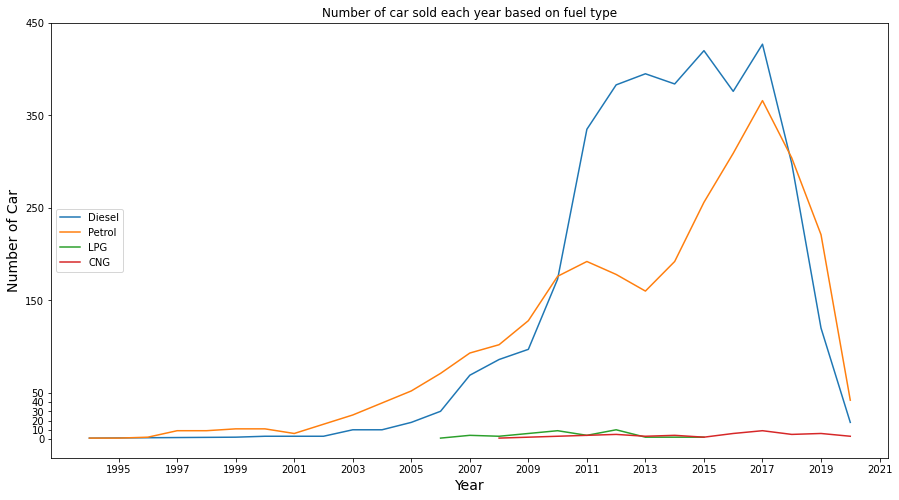

In [55]:
fig = plt.figure(figsize=(15, 8))
ds_car[ds_car['fuel'] == 'Diesel']['year'].value_counts().sort_index(ascending=False).plot.line(label = "Diesel")
ds_car[ds_car['fuel'] == 'Petrol']['year'].value_counts().sort_index(ascending=False).plot.line(label = "Petrol")
ds_car[ds_car['fuel'] == 'LPG']['year'].value_counts().sort_index(ascending=False).plot.line(label = "LPG")
ds_car[ds_car['fuel'] == 'CNG']['year'].value_counts().sort_index(ascending=False).plot.line(label = "CNG")

plt.xticks(np.arange(1995, 2022, 2))
plt.yticks(np.append(np.arange(0, 50, 10),np.arange(50, 451, 100)))
plt.xlabel('Year', fontSize = 14)
plt.ylabel('Number of Car', fontSize = 14)
plt.title('Number of car sold each year based on fuel type')
plt.legend(loc = 'center left')
plt.show()

**Observations**:

- An average diesel cars have **high demands** over the years.
- Petrol cars had a picked demand in the years **2016, 2017**.
- All cars demand to decrease drastically in **2020**.
- LPG cars started their little popularity in **2006**, but almost ended in 2015.
- CNG demand as almost the same every year since **2008** that is very less as compared to diesel and petrol.

**<h3>Question:** Which fuel type have more demand amomg owners?</h3>

<Figure size 1080x576 with 0 Axes>

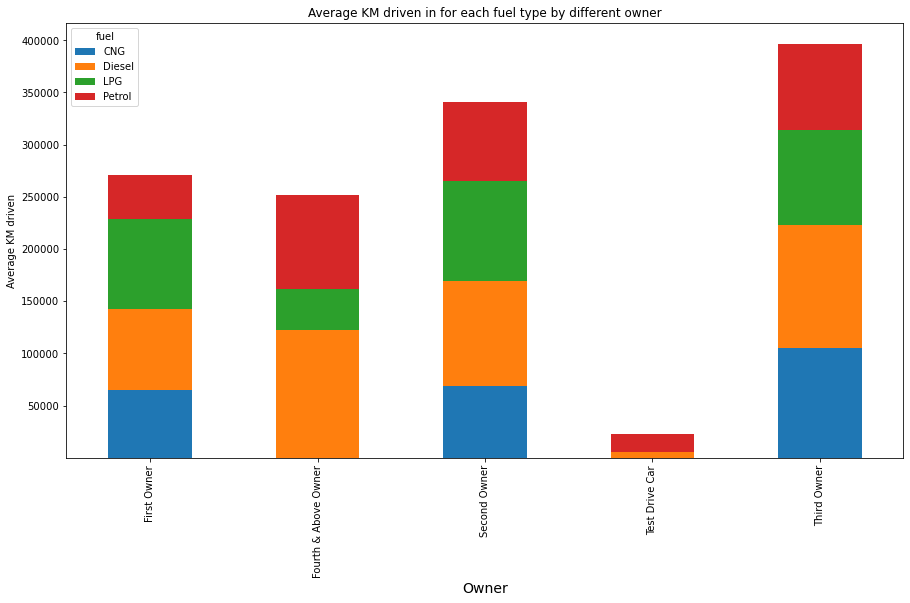

In [56]:
fig = plt.figure(figsize=(15, 8))

visualdata = ds_car.groupby(['owner','fuel'])['km_driven'].mean().unstack('fuel').fillna(0)
visualdata.plot(kind='bar', stacked=True, figsize = (15,8))
plt.xlabel('Owner',fontSize = 14)
plt.ylabel('Average KM driven')
plt.title('Average KM driven in for each fuel type by different owner')
plt.show()

**Observations**:
- Test drive are mostly done on petrol varient
- Diesel car are used most out of all varient

**<h3>Question:** Which brand have most varienty of cars in market?</h3>

In [57]:
ds_sub_top_brand = ds_car.groupby(by='brand')['sub_brand'].nunique().sort_values(ascending=False)[0:11]

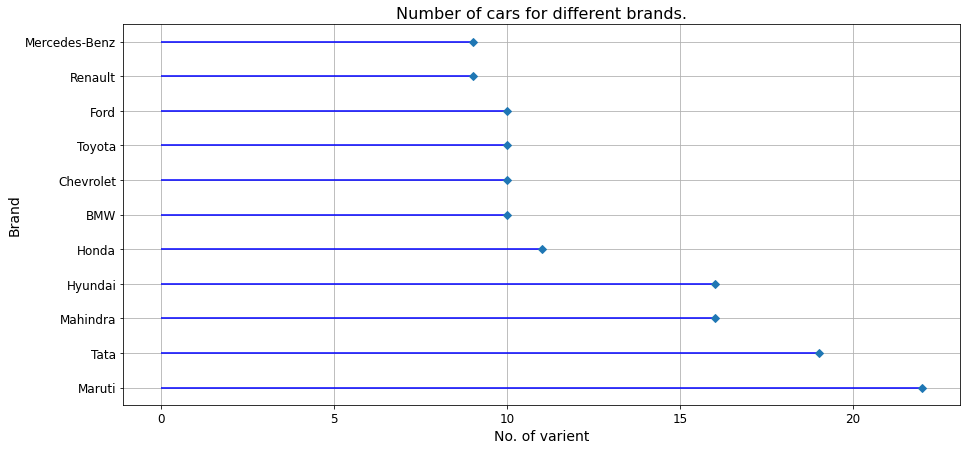

In [58]:
# Create a figure of 15 x 7 inches
plt.figure(figsize=(15,7))

# Plot 
plt.hlines(ds_sub_top_brand.index,xmin=0,xmax=ds_sub_top_brand,color='blue')
plt.plot(ds_sub_top_brand,ds_sub_top_brand.index , "D")

# Adding some cosmetics
plt.xlabel(xlabel='No. of varient', fontsize=14)
plt.ylabel(ylabel='Brand', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title(label='Number of cars for different brands.', fontsize=16)
plt.grid(b=True)

# Display the plot
plt.show()

**Observations**:
- **Maruti, Tata, Mahindra, Hundai** have most number of varient in market. 

In [59]:
ds_car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,mileage KMPL,engine CC,power BHP,brand,sub_brand
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.00,23.40,1248.00,74.00,Maruti,Swift
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.00,21.14,1498.00,103.52,Skoda,Rapid
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.00,17.70,1497.00,78.00,Honda,City
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.00,23.00,1396.00,90.00,Hyundai,i20
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.00,16.10,1298.00,88.20,Maruti,Swift


In [60]:
car_li = ds_car.drop(['name','sub_brand'], axis=1)

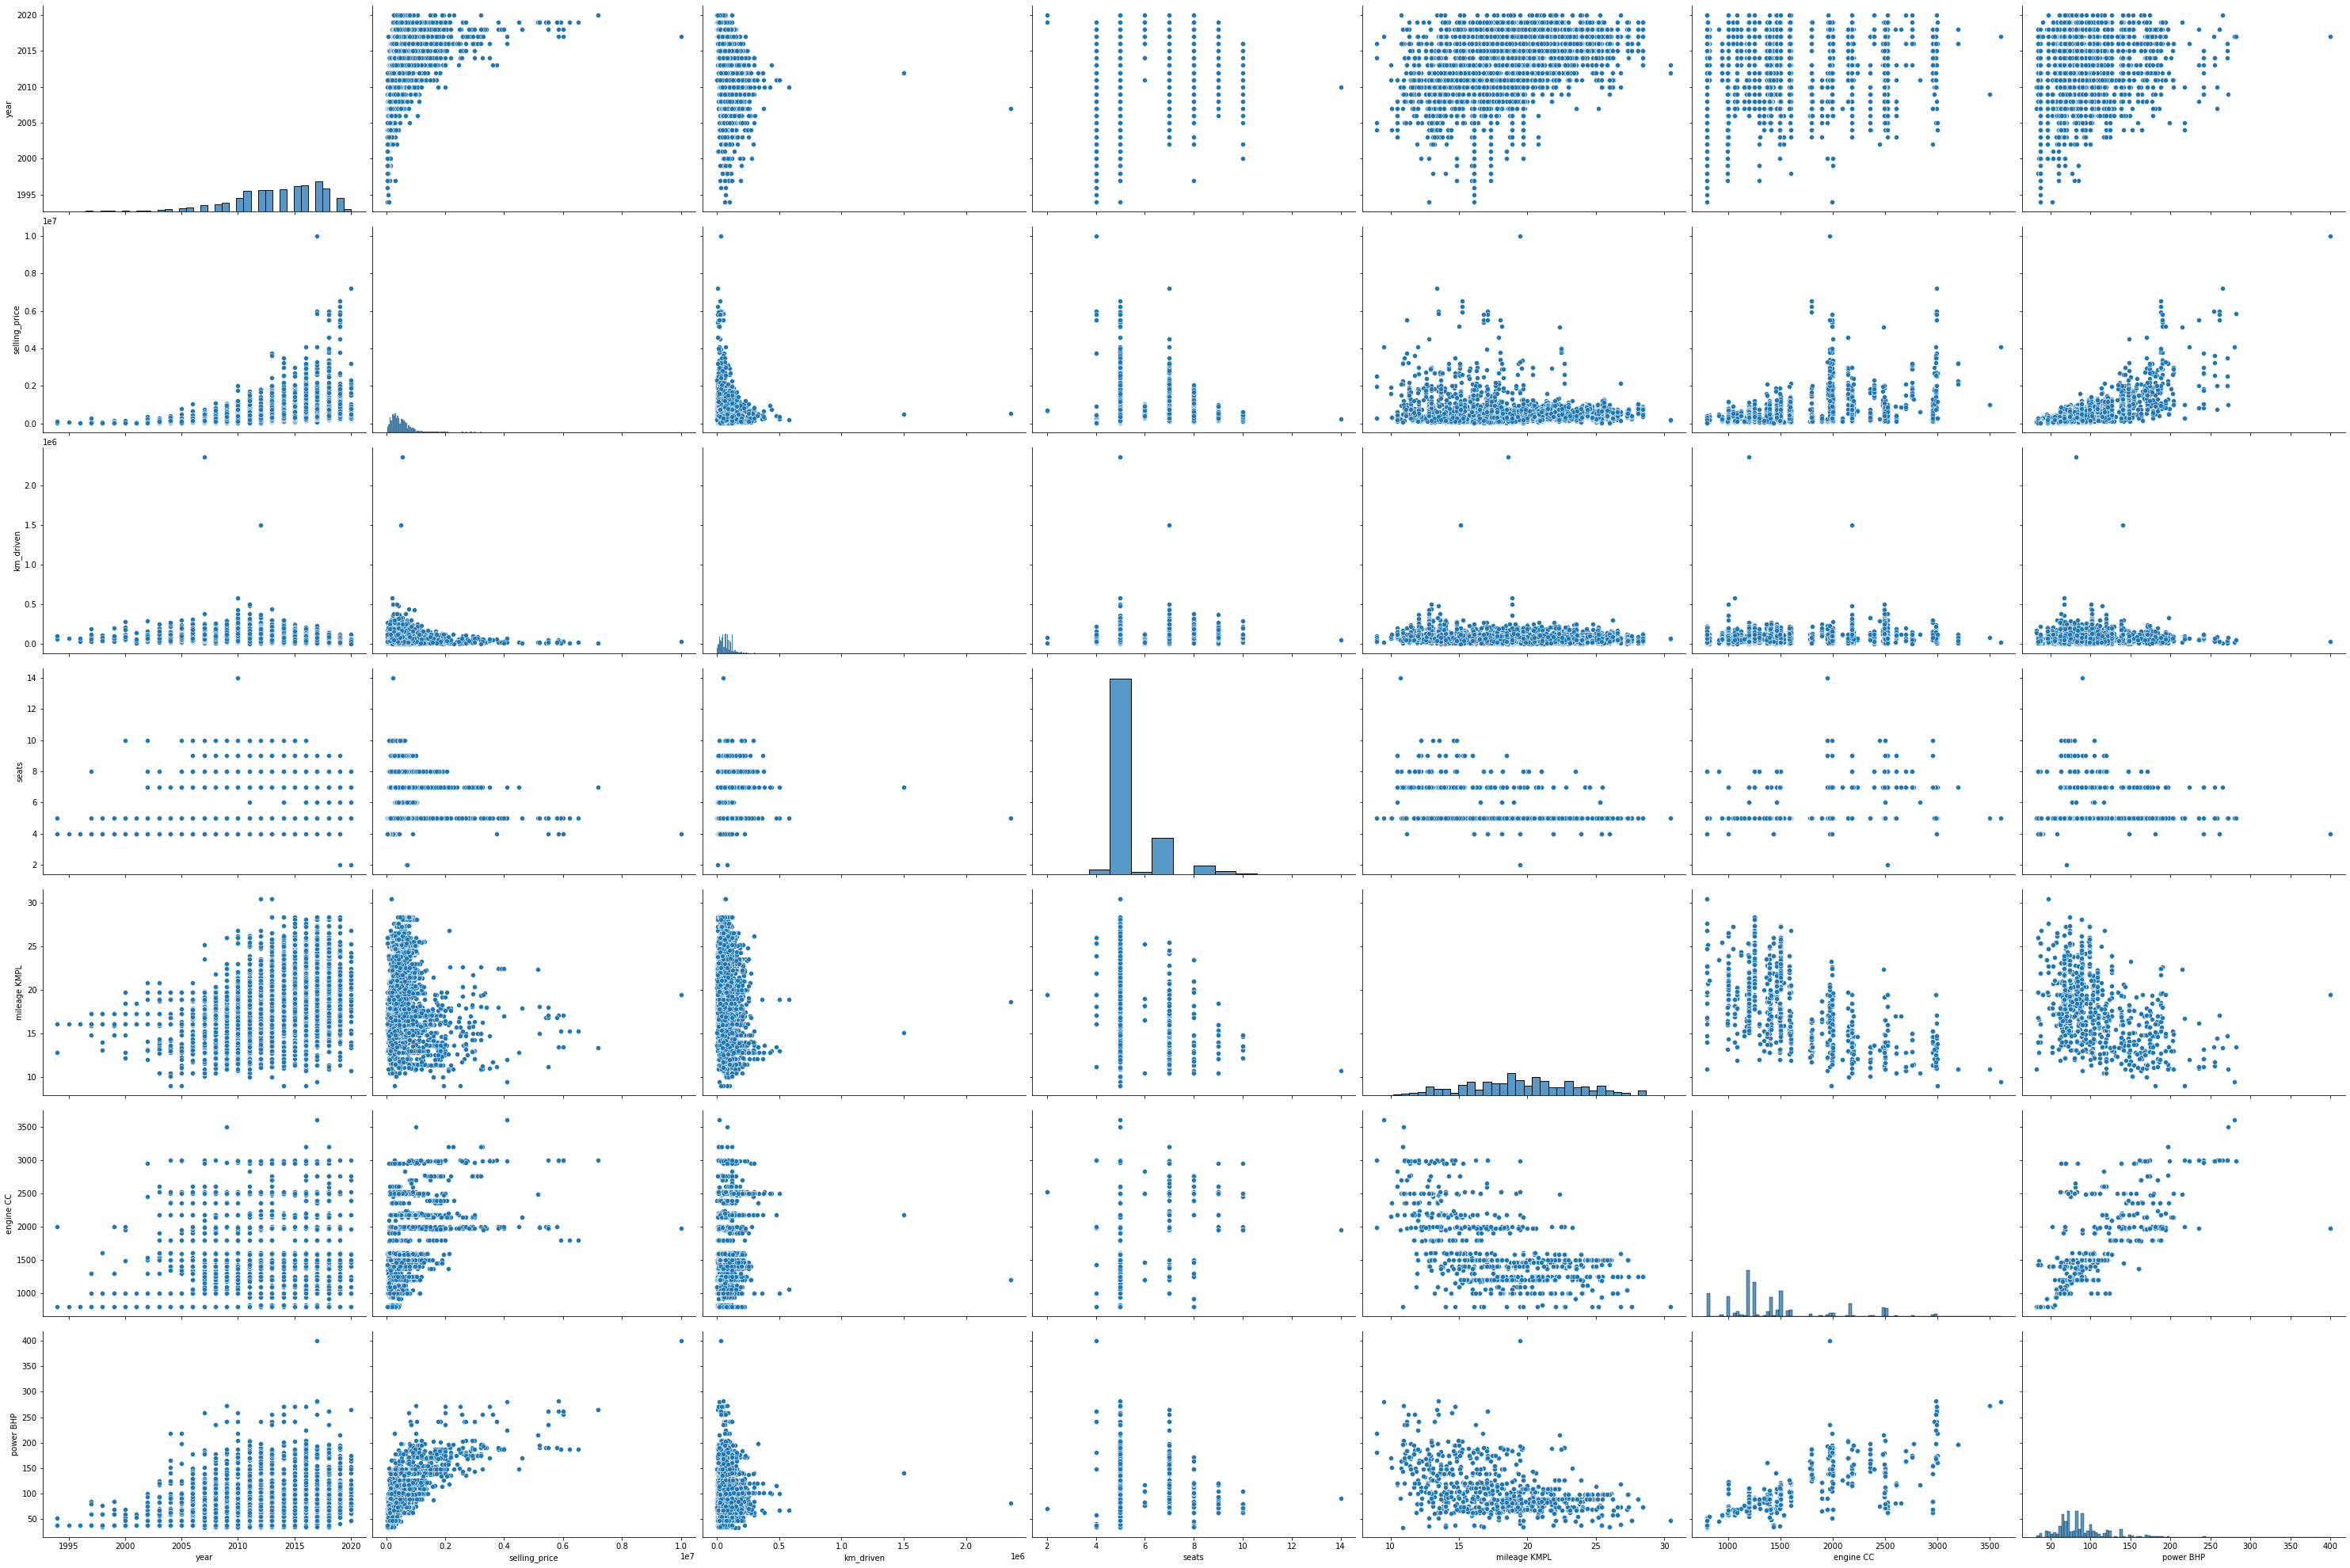

In [61]:
sns.pairplot(car_li, size = 4, aspect = 1.5)
plt.show()

**Observations**:
- **Selling price** is increasing with an increase of **Engine CC and Power**.
- **Mileage** doesn't have much impact on the selling price of the car.

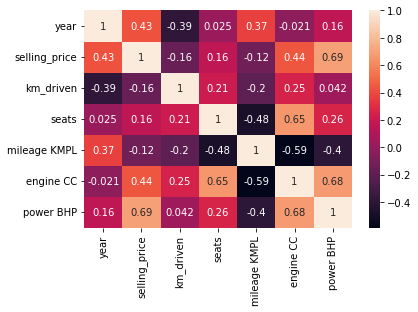

In [62]:
sns.heatmap(car_li.corr(), annot=True );

**Observations**:
- Almost the same information is gathered from the correlation plot.

<a name = Section8></a>

---
# **8. Post Data Processing**
---



<a name = Section81></a>
### **8.1 Data Preparation**

- Now we will **split** our **data** into **dependent** and **independent** variables for further development.

In [63]:
X = car_li.drop(['selling_price'], axis=1)

In [64]:
y = car_li['selling_price']

In [65]:
print(X.shape)
print(y.shape)

(6717, 11)
(6717,)


<a name = Section82></a>
### **8.2 One Hot encoding**

- Convert categorical variable into **dummy/indicator** variables.

In [66]:
X = pd.get_dummies(X, drop_first= True)

In [67]:
X.head()

,year,km_driven,seats,mileage KMPL,engine CC,power BHP,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,brand_Ashok,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,brand_Datsun,brand_Fiat,brand_Force,brand_Ford,brand_Honda,brand_Hyundai,brand_Isuzu,brand_Jaguar,brand_Jeep,brand_Kia,brand_Land,brand_Lexus,brand_MG,brand_Mahindra,brand_Maruti,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_Opel,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,2014,145500,5.00,23.40,1248.00,74.00,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2014,120000,5.00,21.14,1498.00,103.52,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2006,140000,5.00,17.70,1497.00,78.00,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2010,127000,5.00,23.00,1396.00,90.00,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2007,120000,5.00,16.10,1298.00,88.20,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


<a name = Section83></a>
### **8.3 Train test split**

- Train test split. Keeping 20% data in test data.

In [68]:
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.20, random_state=1)
print('Train cases as below')
print('X_train shape: ',X_train_1.shape)
print('y_train shape: ',y_train_1.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test_1.shape)
print('y_test shape: ',y_test_1.shape)

Train cases as below
X_train shape:  (5373, 46)
y_train shape:  (5373,)

Test cases as below
X_test shape:  (1344, 46)
y_test shape:  (1344,)


<a name = Section84></a>
### **8.4 Data Standardization**

__Standardization__ 
- Variables that are measured at different scales do not contribute equally to the model fitting and might end up creating a **bias**. 

- To deal with this potential problem **feature-wise standardization** (`μ=0`, `σ=1`) is usually used **prior** to **model fitting**.

In [69]:
scale_columns = ['year', 'km_driven', 'seats', 'mileage KMPL', 'engine CC', 'power BHP']

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for i in scale_columns:
    X_train_1[i] = scaler.fit_transform(X_train_1[[i]])
    X_test_1[i] = scaler.transform(X_test_1[[i]])

In [71]:
X_train_1.head()

,year,km_driven,seats,mileage KMPL,engine CC,power BHP,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,brand_Ashok,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,brand_Datsun,brand_Fiat,brand_Force,brand_Ford,brand_Honda,brand_Hyundai,brand_Isuzu,brand_Jaguar,brand_Jeep,brand_Kia,brand_Land,brand_Lexus,brand_MG,brand_Mahindra,brand_Maruti,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_Opel,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
5936,1.13,-0.71,-0.44,-0.50,-0.48,0.03,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6856,-0.67,-0.05,-0.44,-1.54,-0.71,-0.81,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
962,-1.44,2.38,1.59,-1.50,2.23,-0.78,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8023,-0.67,-0.19,1.59,-1.98,1.57,3.35,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2869,0.87,-0.05,-0.44,2.29,-0.38,-0.43,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [72]:
X_test_1.head()

,year,km_driven,seats,mileage KMPL,engine CC,power BHP,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,brand_Ashok,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,brand_Datsun,brand_Fiat,brand_Force,brand_Ford,brand_Honda,brand_Hyundai,brand_Isuzu,brand_Jaguar,brand_Jeep,brand_Kia,brand_Land,brand_Lexus,brand_MG,brand_Mahindra,brand_Maruti,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_Opel,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
844,1.39,-0.95,-0.44,-0.15,-0.48,-0.19,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5139,-0.92,0.12,-0.44,0.06,-1.30,-1.31,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
822,-0.15,0.27,-0.44,0.27,-0.89,-0.65,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4399,0.87,-0.87,-0.44,-0.81,1.07,2.59,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3654,0.62,-0.22,1.59,-0.25,0.12,0.38,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


<a name = Section9></a>

---
# **9. Model Development & Evaluation**
---

- In this section we will **develop Linear Regression model** 

- Then we will **analyze the results** obtained and **make our observations**.

- For **evaluation purpose** we will **focus** on **RMSE**, **R2** and **Adjusted R2** scores.

- We will do **change randomness** and **Test size** see if the scores improves. 

<a name = Section91></a>
### **9.1 Model 1**

In [73]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train_1, y_train_1) 

LinearRegression()

In [74]:
y_pred_train_1 = linreg.predict(X_train_1)  
y_pred_test_1 = linreg.predict(X_test_1) 

In [75]:
feature_cols = X_train_1.columns.to_list()

In [76]:
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()            
coef.insert(0, linreg.intercept_)  

In [77]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept 907021.3615341289
year 163718.54351807735
km_driven -29976.01464003167
seats -171.74420931478522
mileage KMPL -18481.152005213928
engine CC 23001.399091244475
power BHP 189603.63444467043
fuel_Diesel 163495.99809010478
fuel_LPG 146355.8612642571
fuel_Petrol 64913.73051583363
seller_type_Individual -56235.68673980622
seller_type_Trustmark Dealer -91625.9143500372
transmission_Manual -92002.01901208141
owner_Fourth & Above Owner -40616.975431578954
owner_Second Owner -55512.70425652871
owner_Test Drive Car 2282368.461850069
owner_Third Owner -34883.25776278984
brand_Ashok 2.3283064365386963e-09
brand_Audi 466337.57499560673
brand_BMW 1201659.7528554383
brand_Chevrolet -489453.5927696031
brand_Daewoo 47472.51804890236
brand_Datsun -508998.5442819698
brand_Fiat -492394.5550313064
brand_Force -430557.41453351843
brand_Ford -415903.9880133375
brand_Honda -416547.0759563613
brand_Hyundai -396903.31124522735
brand_Isuzu 164812.7525374518
brand_Jaguar 790538.1513495513
brand_Jeep 9754

__y = 907021.3615341289 + year `*` 163718.54351807735 + km_driven `*` -29976.01464003167 + seats `*` -171.74420931478522 + mileage KMPL `*` -18481.152005213928 + engine CC `*` 23001.399091244475 + power BHP `*` 189603.63444467043 + fuel_Diesel `*` 163495.99809010478 + fuel_LPG `*` 146355.8612642571 + fuel_Petrol `*` 64913.73051583363 + seller_type_Individual `*` -56235.68673980622 + seller_type_Trustmark Dealer `*` -91625.9143500372 + transmission_Manual `*` -92002.01901208141 + owner_Fourth & Above Owner `*` -40616.975431578954 + owner_Second Owner `*` -55512.70425652871 + owner_Test Drive Car `*` 2282368.461850069 +
owner_Third Owner `*` -34883.25776278984 + 
brand_Ashok `*` 2.3283064365386963e-09 +
brand_Audi `*` 466337.57499560673 +
brand_BMW `*` 1201659.7528554383 +
brand_Chevrolet `*` -489453.5927696031 +
brand_Daewoo `*` 47472.51804890236 +
brand_Datsun `*` -508998.5442819698 +
brand_Fiat `*` -492394.5550313064 +
brand_Force `*` -430557.41453351843 +
brand_Ford `*` -415903.9880133375 +
brand_Honda `*` -416547.0759563613 +
brand_Hyundai `*` -396903.31124522735 +
brand_Isuzu `*` 164812.7525374518 +
brand_Jaguar `*` 790538.1513495513 +
brand_Jeep `*` 97541.22436328296 +
brand_Kia `*` 253621.30268504584 +
brand_Land `*` 1580294.9760306738 +
brand_Lexus `*` 3132154.898222914 +
brand_MG `*` 203875.04371869846 +
brand_Mahindra `*` -407482.7278314043 + 
brand_Maruti `*` -306593.5850575874 +
brand_Mercedes-Benz `*` 702331.2216229752 +
brand_Mitsubishi `*` -140380.15862668274 +
brand_Nissan `*` -418842.2312262671 +
brand_Opel `*` -21102.41179355432 +
brand_Renault `*` -427967.5041666517 +
brand_Skoda `*` -383088.154841171 +
brand_Tata `*` -498905.3457376034 +
brand_Toyota `*` -117238.7723752841 +
brand_Volkswagen `*` -485372.81342120504 +
brand_Volvo `*` 2104729.60491257

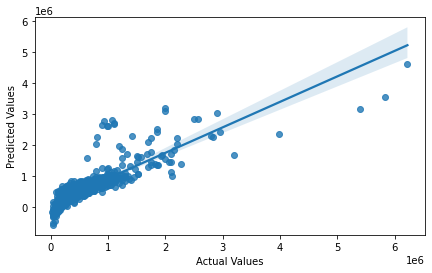

In [78]:
fig = plt.figure(figsize=(7, 4))
sns.regplot(y_test_1,y_pred_test_1)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

**Observations**:

- About 90% of the target variable is near the best fit line.
- Very few points are far away from the best-fit line.

In [79]:
from sklearn import metrics
RMSE_train_1 = np.sqrt( metrics.mean_squared_error(y_train_1, y_pred_train_1))
RMSE_test_1 = np.sqrt(metrics.mean_squared_error(y_test_1, y_pred_test_1))

In [80]:
print('RMSE for training set is {}'.format(RMSE_train_1))
print('RMSE for test set is {}'.format(RMSE_test_1))

RMSE for training set is 261938.4461677737
RMSE for test set is 247236.63967643495


In [81]:
r2_train_1 = metrics.r2_score(y_train_1,y_pred_train_1)
r2_test_1 = metrics.r2_score(y_test_1,y_pred_test_1)
print("R2 score for training set is {}".format(r2_train_1))
print("R2 score for test set is {}".format(r2_test_1))

R2 score for training set is 0.7620441308355499
R2 score for test set is 0.71816135728163


In [82]:
adj_r_squared_train_1 = 1 - (1-r2_train_1)*(len(y_train_1)-1)/(len(y_train_1)-X_train_1.shape[1]-1)
adj_r_squared_test_1 = 1 - (1-r2_test_1)*(len(y_test_1)-1)/(len(y_test_1)-X_test_1.shape[1]-1)
print("Adjusted R2 score for training set is {}".format(adj_r_squared_train_1))
print("Adjusted R2 score for test set is {}".format(adj_r_squared_test_1))

Adjusted R2 score for training set is 0.7599889355705172
Adjusted R2 score for test set is 0.70816553803333


**Observations**:

- **RMSE**, **R2** and **Adjusted R2** scrore of **train** data is **261938.45**, **0.762** and **0.76**.
- **RMSE**, **R2** and **Adjusted R2** scrore of **test** data is **247236.64**, **0.712** and **0.76**.

<a name = Section92></a>
### **9.2 Model 2**

<a name = Section921></a>
### **9.2.1 Train test split**

- Train test split. Keeping 25% data in test data and with different random state.

In [83]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.25, random_state=2)
print('Train cases as below')
print('X_train shape: ',X_train_2.shape)
print('y_train shape: ',y_train_2.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test_2.shape)
print('y_test shape: ',y_test_2.shape)

Train cases as below
X_train shape:  (5037, 46)
y_train shape:  (5037,)

Test cases as below
X_test shape:  (1680, 46)
y_test shape:  (1680,)


<a name = Section922></a>
### **9.2.2 Data Standardization**

In [84]:
scaler1 = StandardScaler()
for i in scale_columns:
    X_train_2[i] = scaler1.fit_transform(X_train_2[[i]])
    X_test_2[i] = scaler1.transform(X_test_2[[i]])

In [85]:
X_train_2.head()

,year,km_driven,seats,mileage KMPL,engine CC,power BHP,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,brand_Ashok,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,brand_Datsun,brand_Fiat,brand_Force,brand_Ford,brand_Honda,brand_Hyundai,brand_Isuzu,brand_Jaguar,brand_Jeep,brand_Kia,brand_Land,brand_Lexus,brand_MG,brand_Mahindra,brand_Maruti,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_Opel,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
1784,-0.16,0.32,-0.43,0.13,-0.07,-0.62,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4859,0.10,-0.06,-0.43,0.94,-0.38,-0.44,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7990,0.10,-0.44,-0.43,1.40,-0.08,-0.59,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3923,0.10,1.82,-0.43,0.71,-0.38,-0.44,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7735,-1.44,-0.84,-1.44,-0.87,-1.31,-1.61,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [86]:
X_test_2.head()

,year,km_driven,seats,mileage KMPL,engine CC,power BHP,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,brand_Ashok,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,brand_Datsun,brand_Fiat,brand_Force,brand_Ford,brand_Honda,brand_Hyundai,brand_Isuzu,brand_Jaguar,brand_Jeep,brand_Kia,brand_Land,brand_Lexus,brand_MG,brand_Mahindra,brand_Maruti,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_Opel,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
814,0.61,-0.06,2.59,-0.69,-1.31,-1.70,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1686,-0.93,-0.46,-0.43,-0.26,-0.49,-0.25,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1405,-0.67,0.23,-0.43,-0.38,-0.38,-0.40,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3152,-0.16,-0.63,-0.43,-0.23,-0.49,-0.06,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
968,-0.41,-0.63,-0.43,0.27,0.34,0.50,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


<a name = Section923></a>
### **9.2.3 Linear Model**

In [87]:
linreg_2 = LinearRegression()
linreg_2.fit(X_train_2, y_train_2) 

LinearRegression()

In [88]:
y_pred_train_2 = linreg_2.predict(X_train_2)  
y_pred_test_2 = linreg_2.predict(X_test_2) 

In [89]:
coef = linreg_2.coef_.tolist()            
coef.insert(0, linreg_2.intercept_)  

eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept 654965.731415916
year 155994.20009910464
km_driven -49625.20303478435
seats -3742.912067862326
mileage KMPL -24627.039317121104
engine CC 30102.68511556084
power BHP 178880.52951709105
fuel_Diesel 161771.21933531045
fuel_LPG 124151.60103035926
fuel_Petrol 42185.830397898535
seller_type_Individual -36581.501279231124
seller_type_Trustmark Dealer -56352.70339478642
transmission_Manual -96324.26949305515
owner_Fourth & Above Owner -32938.37766457892
owner_Second Owner -52045.27357239347
owner_Test Drive Car 2627957.547172184
owner_Third Owner -46622.83230605961
brand_Ashok -102636.14749783398
brand_Audi 711303.4675638468
brand_BMW 1100638.1715215733
brand_Chevrolet -243174.93685225368
brand_Daewoo 279394.23831871274
brand_Datsun -254378.8442727217
brand_Fiat -228800.33501883826
brand_Force -156439.73136714488
brand_Ford -159075.3098343803
brand_Honda -151732.2587746069
brand_Hyundai -147853.28594996536
brand_Isuzu 313152.0440865603
brand_Jaguar 1038454.8062166581
brand_Jeep 3047

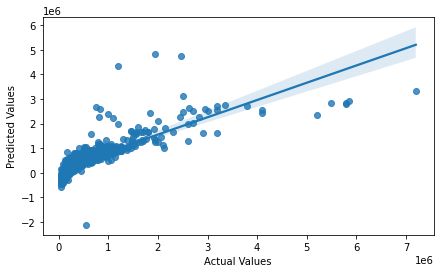

In [90]:
fig = plt.figure(figsize=(7, 4))
sns.regplot(y_test_2,y_pred_test_2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

**Observations**:

- Few negative valve added in test data.
- About 90% of the target variable is near the best fit line.
- Very few points are far away from the best-fit line.

In [91]:
RMSE_train_2 = np.sqrt( metrics.mean_squared_error(y_train_2, y_pred_train_2))
RMSE_test_2 = np.sqrt(metrics.mean_squared_error(y_test_2, y_pred_test_2))

In [92]:
print('RMSE for training set is {}'.format(RMSE_train_2))
print('RMSE for test set is {}'.format(RMSE_test_2))

RMSE for training set is 245495.9368954362
RMSE for test set is 305284.99047559727


In [93]:
r2_train_2 = metrics.r2_score(y_train_2,y_pred_train_2)
r2_test_2 = metrics.r2_score(y_test_2,y_pred_test_2)
print("R2 score for training set is {}".format(r2_train_2))
print("R2 score for test set is {}".format(r2_test_2))

R2 score for training set is 0.7772322806006208
R2 score for test set is 0.672546077667


In [94]:
adj_r_squared_train_2 = 1 - (1-r2_train_2)*(len(y_train_2)-1)/(len(y_train_2)-X_train_2.shape[1]-1)
adj_r_squared_test_2 = 1 - (1-r2_test_2)*(len(y_test_2)-1)/(len(y_test_2)-X_test_2.shape[1]-1)
print("Adjusted R2 score for training set is {}".format(adj_r_squared_train_2))
print("Adjusted R2 score for test set is {}".format(adj_r_squared_test_2))

Adjusted R2 score for training set is 0.7751787104418288
Adjusted R2 score for test set is 0.6633220235167747


**Observations**:

- **RMSE**, **R2** and **Adjusted R2** scrore of **train** data is **245495.94**, **0.78** and **0.77**.
- **RMSE**, **R2** and **Adjusted R2** scrore of **test** data is **305284.10**, **0.67** and **0.66**.
- Train data R2 and Adjusted R2 is increases but fot test data it is decreases.
- Overfitting is increased.

<a name = Section93></a>
### **9.3 Model 3**

<a name = Section931></a>
### **9.3.1 Train test split**

- Train test split. Keeping 30% data in test data and with different random state.

In [95]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=0.30, random_state=3)
print('Train cases as below')
print('X_train shape: ',X_train_3.shape)
print('y_train shape: ',y_train_3.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test_3.shape)
print('y_test shape: ',y_test_3.shape)

Train cases as below
X_train shape:  (4701, 46)
y_train shape:  (4701,)

Test cases as below
X_test shape:  (2016, 46)
y_test shape:  (2016,)


<a name = Section932></a>
### **9.3.2 Data Standardization**

In [96]:
scaler3 = StandardScaler()
for i in scale_columns:
    X_train_3[i] = scaler3.fit_transform(X_train_3[[i]])
    X_test_3[i] = scaler3.transform(X_test_3[[i]])

In [97]:
X_train_3.head()

,year,km_driven,seats,mileage KMPL,engine CC,power BHP,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,brand_Ashok,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,brand_Datsun,brand_Fiat,brand_Force,brand_Ford,brand_Honda,brand_Hyundai,brand_Isuzu,brand_Jaguar,brand_Jeep,brand_Kia,brand_Land,brand_Lexus,brand_MG,brand_Mahindra,brand_Maruti,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_Opel,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
4040,-1.16,0.74,-0.44,-0.09,-0.09,-0.60,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8019,-0.14,0.26,-0.44,-0.14,-0.90,-0.66,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5389,1.39,-1.15,-0.44,1.99,-0.80,-0.60,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4458,-0.14,-0.38,-0.44,-0.97,-0.50,-0.75,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7286,-0.65,0.06,-0.44,0.14,-0.08,-0.63,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [98]:
X_test_3.head()

,year,km_driven,seats,mileage KMPL,engine CC,power BHP,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,brand_Ashok,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,brand_Datsun,brand_Fiat,brand_Force,brand_Ford,brand_Honda,brand_Hyundai,brand_Isuzu,brand_Jaguar,brand_Jeep,brand_Kia,brand_Land,brand_Lexus,brand_MG,brand_Mahindra,brand_Maruti,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_Opel,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
1038,-0.65,-0.22,1.58,-1.69,2.13,0.43,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7728,-0.65,0.38,-0.44,-0.17,-0.39,0.06,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4873,1.13,-0.62,-0.44,1.23,-0.39,0.01,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
758,-0.14,0.10,-0.44,0.42,-1.27,-1.03,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1040,0.11,-0.80,0.57,-0.74,2.14,0.53,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


<a name = Section933></a>
### **9.3.3 Linear Model**

In [99]:
linreg3 = LinearRegression()
linreg3.fit(X_train_3, y_train_3) 

LinearRegression()

In [100]:
y_pred_train_3 = linreg3.predict(X_train_3)  
y_pred_test_3 = linreg3.predict(X_test_3) 

In [101]:
coef = linreg3.coef_.tolist()            
coef.insert(0, linreg3.intercept_)  

eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept 795867.0882683625
year 174676.60578315306
km_driven -32133.718067609316
seats -5870.264909158139
mileage KMPL -40435.30724951395
engine CC 22760.908293339413
power BHP 165575.2712974749
fuel_Diesel 185023.69328011235
fuel_LPG 149940.0551053017
fuel_Petrol 52875.29164262147
seller_type_Individual -62938.497240279146
seller_type_Trustmark Dealer -92217.87869594237
transmission_Manual -120725.11352815107
owner_Fourth & Above Owner -22306.37070976816
owner_Second Owner -61086.65973736177
owner_Test Drive Car 2046333.138726128
owner_Third Owner -49661.2934132283
brand_Ashok 1.6589183360338211e-09
brand_Audi 625276.6453124584
brand_BMW 1324229.0505412922
brand_Chevrolet -351284.2329030011
brand_Daewoo 199241.28652202306
brand_Datsun -363187.2881288929
brand_Fiat -356594.52394827077
brand_Force -384522.0547531073
brand_Ford -263662.83399565954
brand_Honda -244810.68584731666
brand_Hyundai -250415.63415650593
brand_Isuzu 148533.98923798796
brand_Jaguar 852027.4077150343
brand_Jeep 36

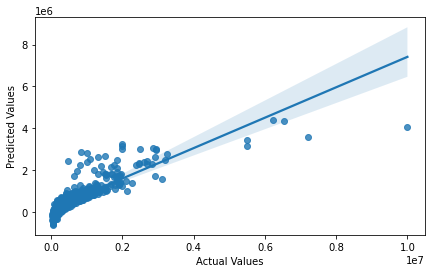

In [102]:
fig = plt.figure(figsize=(7, 4))
sns.regplot(y_test_3,y_pred_test_3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

**Observations**:

- About 90% of the target variable is near the best fit line.
- Very few points are far away from the best-fit line.

In [103]:
RMSE_train_3 = np.sqrt( metrics.mean_squared_error(y_train_3, y_pred_train_3))
RMSE_test_3 = np.sqrt(metrics.mean_squared_error(y_test_3, y_pred_test_3))

In [104]:
print('RMSE for training set is {}'.format(RMSE_train_3))
print('RMSE for test set is {}'.format(RMSE_test_3))

RMSE for training set is 257488.7300684585
RMSE for test set is 268931.1088133472


In [105]:
r2_train_3 = metrics.r2_score(y_train_3,y_pred_train_3)
r2_test_3 = metrics.r2_score(y_test_3,y_pred_test_3)
print("R2 score for training set is {}".format(r2_train_3))
print("R2 score for test set is {}".format(r2_test_3))

R2 score for training set is 0.759227897725958
R2 score for test set is 0.7330571665932033


In [106]:
adj_r_squared_train_3 = 1 - (1-r2_train_3)*(len(y_train_3)-1)/(len(y_train_3)-X_train_3.shape[1]-1)
adj_r_squared_test_3 = 1 - (1-r2_test_3)*(len(y_test_3)-1)/(len(y_test_3)-X_test_3.shape[1]-1)
print("Adjusted R2 score for training set is {}".format(adj_r_squared_train_3))
print("Adjusted R2 score for test set is {}".format(adj_r_squared_test_3))

Adjusted R2 score for training set is 0.7568481133029658
Adjusted R2 score for test set is 0.7268208180219933


**Observations**:

- **RMSE**, **R2** and **Adjusted R2** scrore of **train** data is **257488.73**, **0.75** and **0.75**.
- **RMSE**, **R2** and **Adjusted R2** scrore of **test** data is **268931.10**, **0.73** and **0.72**.
- Overfitting is reduced.
- More scope of increasing model performace.

|  Model number| R2 | Adjusted R2 |
| :--: | :--: | :--: | 
|Model1: | 0.71 | 0.76 | 
|Model2: | 0.67 | 0.66 | 
|Model3: | 0.73 | 0.72 | 

- Third model seems to be better model.
- We will try other model in future tems to make accuracy more better.

In [109]:
y_df = pd.DataFrame(y_pred_test_3)
y_df.head()

,0
0,880909.66
1,373499.10
2,792610.12
3,112173.94
4,724839.78


In [110]:
y_df.to_csv('sample_submission.csv')

<a name = Section10></a>

---
# **10. Summarization**
---

<a name = Section101></a>
### **10.1 Conclusion**

- Trying different random dataset helps in improving model. 